# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
#import all the dependency here

import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    
    # Your code here
    df = pd.read_csv('readonly/fraud_data.csv')
    
    # class = 1 - fraud
    # class = 0 - no fraud
    
    adj = df['Class']
    top = df[df.Class == 1]
    topnum = len(top)
    topnum
    bnum = len(df)
    bnum
    answer = topnum/bnum
    answer
    
    
    return answer # Return your answer
answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('readonly/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21688,-3.959670,3.297819,-1.079436,-2.290106,-1.405133,2.452586,-4.649235,-12.365464,0.409493,1.251992,...,-2.572780,12.617463,-2.969195,1.755050,0.433324,-0.010827,-0.126613,0.200111,-0.160542,29.95
21689,-1.066503,0.539240,0.735343,-0.506800,0.843980,-1.047877,1.141302,-0.127448,-0.119221,-1.870265,...,0.232487,-0.162535,-0.576352,-0.184969,-0.136154,0.760012,0.048105,-0.017475,0.092365,85.66
21690,-2.175162,-0.441681,1.883137,-0.267440,1.056972,0.136404,0.113595,-0.055983,0.765616,-0.087568,...,-0.217800,-0.201561,0.397761,-0.855500,-0.627900,0.590977,0.515065,0.433089,-0.150291,131.10
21691,0.031406,0.694817,0.083233,-0.797912,0.564318,-0.560787,0.805901,0.051453,-0.053817,-0.200190,...,-0.101536,-0.255891,-0.664635,0.018844,-0.539177,-0.504019,0.155133,0.232846,0.079420,4.49


In [5]:
y

0        0
1        0
2        0
3        0
4        0
        ..
21688    0
21689    0
21690    0
21691    0
21692    0
Name: Class, Length: 21693, dtype: int64

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [100]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    
    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(X, y)
    acc = dummy_clf.score(X_test, y_test)
    y_pred = dummy_clf.predict(X_test)
    rec = recall_score(y_test, y_pred)
    tup = (acc, rec)
    
    return tup # Return your answer
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [101]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    # Your code here
    
    #import
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    
    # clf
    clf = SVC().fit(X_train, y_train)
    
    # predict 
    y_pred = clf.predict(X_test)
    
    # accuracy score
    acc = clf.score(X_test, y_test)
    
    # recall score
    rec = recall_score(y_test, y_pred)
    
    # precision score
    pre = precision_score(y_test, y_pred)
    
    return (acc, rec, pre) # Return your answer
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [102]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svc = SVC(C = 1e9, gamma = 1e-07, probability=True).fit(X_train, y_train)
    threshold = -220
    
    df = svc.decision_function(X_test)

    desired_predict =[]

    for i in df:
        if i<threshold:
            desired_predict.append(0)
        else:
            desired_predict.append(1)
    
    cm = confusion_matrix( y_test , desired_predict )
    
    return cm# Return your answer
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8, 0.9)

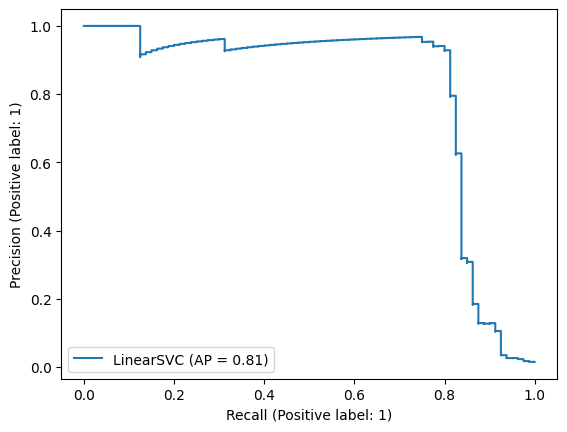

In [103]:
def answer_five(#argument here):
        
    # Your code here
    
    # clf
    clf = LogisticRegression().fit(X_train, y_train)
    
    # precision recall curve with precision 0.75
    display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="LinearSVC"
    )
    
    ans1 = 0.8
    
    # roc curve; true positive rate with false positive rate of 0.16
    ans2 = 0.9
    
    
    return (ans1, ans2) # Return your answer
answer_five()

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay
from sklearn import metrics
   
def funct1():
    
    #clf : WRITE DOWN WHAT CLF MEANS
    clf = LogisticRegression().fit(X_train, y_train)

    # precision recall curve with precision 0.75
    display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="LinearSVC"
    )

    
#funct1()

In [105]:
def funct2():
    # roc curve; true positive rate with false positive rate of 0.16
    #from sklearn.linear_model import LogisticRegression
    #from sklearn.metrics import (precision_recall_curve,
    #                             PrecisionRecallDisplay)
    #from sklearn import metrics
    clf = LogisticRegression().fit(X_train, y_train)
    metrics.plot_roc_curve(clf, X_test, y_test) 
#funct2()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [110]:
def answer_six(grid):    
    '''
    **move this outside of a function**
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    '''
    # Your code here
    #grid  = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    clf = LogisticRegression()
    log=GridSearchCV(clf, param_grid = grid, scoring = 'recall')
    log.fit(X_train, y_train)
    
    return np.array(log.cv_results_['mean_test_score'].reshape(5,2)) # Return your answer

grid_dict  = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
mean_test_array = answer_six(grid_dict)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

array([[       nan, 0.80064935],
       [       nan, 0.80785714],
       [       nan, 0.80428571],
       [       nan, 0.79694805],
       [       nan, 0.81512987]])

In [79]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    #%matplotlib notebook
    #import seaborn as sns
    #import matplotlib.pyplot as plt
    #plt.figure()
    #sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    #plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Your code here
grid  = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
clf = LogisticRegression()
log=GridSearchCV(clf, param_grid = grid, scoring = 'recall')
log.fit(X_train, y_train)
log.cv_results_['mean_test_score']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

array([       nan, 0.80064935,        nan, 0.80785714,        nan,
       0.80428571,        nan, 0.79694805,        nan, 0.81512987])

In [109]:
log

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='recall')